Analysis on the seasonal patterns in rental behaviors

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
# Import the raw data from a CSV file into a pandas DataFrame
FILE_PATH = '../../data/raw/rental.csv'
df = pd.read_csv(FILE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rental_id     16044 non-null  int64 
 1   rental_date   16044 non-null  object
 2   inventory_id  16044 non-null  int64 
 3   customer_id   16044 non-null  int64 
 4   return_date   15861 non-null  object
 5   staff_id      16044 non-null  int64 
 6   last_update   16044 non-null  object
dtypes: int64(4), object(3)
memory usage: 877.5+ KB


In [7]:
# Drop unnecessary columns
df = df.drop(columns=['inventory_id', 'customer_id', 'return_date', 'staff_id', 'last_update'])
# Convert 'rental_date' to datetime objects
df['rental_date'] = pd.to_datetime(df['rental_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rental_id    16044 non-null  int64         
 1   rental_date  16044 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 250.8 KB


In [8]:
# Extract month and year from 'rental_date' and group by seasons
df['month'] = df['rental_date'].dt.month
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['season'] = df['month'].apply(month_to_season)

# Convert 'season' to a categorical variable with a specific order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
# Group by season and count the number of rentals
seasonal_rentals = df.groupby('season').size()
seasonal_rentals

C:\Users\ojeri\AppData\Local\Temp\ipykernel_37504\1269031487.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df.groupby('season').size()


season
Winter      182
Spring     1156
Summer    14706
Fall          0
dtype: int64

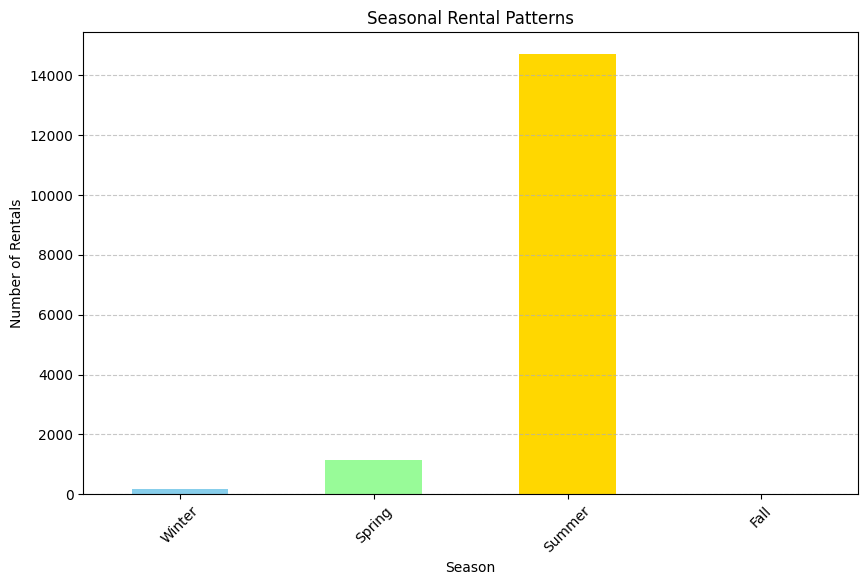

In [ ]:
# Define colors for each season
season_colors = {
    "Winter": "#87CEEB",  # Sky Blue
    "Spring": "#98FB98",  # Pale Green
    "Summer": "#FFD700",  # Gold
    "Fall": "#DEB887",  # Burlywood
}

# Plot the seasonal rental patterns
plt.figure(figsize=(10, 6))
seasonal_rentals.plot(kind="bar", color=[season_colors[season] for season in seasonal_rentals.index])
plt.title("Seasonal Rental Patterns")
plt.xlabel("Season")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
# Save the cleaned DataFrame to a new CSV file
CLEANED_FILE_PATH = '../../data/processed/cleaned_rental.csv'
df.to_csv(CLEANED_FILE_PATH, index=False)